# **Implementing a Predictor from scratch**

Gabriela Elizabeth Avila Chan (2009003)

*   Target: porc_pob_15_~10 (Percentage of population aged 15 years or more illiterate in 2010)
*   Problem: Regression
*   Question: What is the percentage of the illiterate population considering other socioeconomic indicators in 2010 in the capitals of the states of Mexico?



# ---> Dataset preprocessing

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("/content/Indicadores_municipales_sabana_DA.csv", encoding='ISO-8859-1')
dataset

,ent,nom_ent,mun,clave_mun,nom_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,...,pobreza_alim_10,pobreza_cap_90,pobreza_cap_00,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10
0,1,Aguascalientes,1,1001,Aguascalientes,794304,30.531104,2.264478,28.266627,27.983320,...,11.805700,20.4,12.7,18.474600,43.4,33.7,41.900398,0.473,0.425,0.422628
1,1,Aguascalientes,2,1002,Asientos,48592,67.111172,8.040704,59.070468,22.439389,...,21.993299,39.9,29.0,30.980801,64.2,48.9,59.175800,0.379,0.533,0.343879
2,1,Aguascalientes,3,1003,Calvillo,53104,61.360527,7.241238,54.119289,29.428583,...,19.266800,39.5,33.1,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781
3,1,Aguascalientes,4,1004,Cosío,14101,52.800458,4.769001,48.031458,27.128568,...,14.303200,35.2,21.0,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984
4,1,Aguascalientes,5,1005,Jesús María,101379,45.338512,6.084037,39.254475,26.262912,...,15.085100,36.6,22.6,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,32,Zacatecas,54,32054,Villa Hidalgo,21016,74.848837,12.301183,62.547654,19.229856,...,30.055300,51.8,54.8,41.368999,73.5,70.9,70.859596,0.403,0.589,0.342037
2452,32,Zacatecas,55,32055,Villanueva,27385,65.450191,10.203506,55.246687,23.623556,...,13.138800,34.2,25.9,20.563601,57.8,44.1,46.659199,0.422,0.463,0.362527
2453,32,Zacatecas,56,32056,Zacatecas,117528,29.541959,3.535624,26.006335,16.644262,...,7.164800,15.7,20.7,12.115300,36.6,41.8,32.302700,0.528,0.498,0.436339
2454,32,Zacatecas,57,32057,Trancoso,20456,78.374962,14.607016,63.767946,13.750759,...,21.285900,36.2,36.4,30.037100,60.5,54.7,57.394501,0.380,0.483,0.365307


In [ ]:
#1. know which columns have missing values

missing_values = dataset.isnull().sum()
for column, count in missing_values.items():
    if count > 0:
        print(f'Columns "{column}": {count} missing values')

Columns "cpic_cv": 2 missing values
Columns "pobtot_00": 14 missing values
Columns "pobtot_05": 2 missing values
Columns "porc_pob_15_analfa00": 14 missing values
Columns "porc_pob_15_analfa05": 2 missing values
Columns "porc_pob614_noasiste00": 14 missing values
Columns "porc_pob614_noasiste05": 2 missing values
Columns "porc_pob15_basicainc00": 14 missing values
Columns "porc_pob15_basicainc05": 2 missing values
Columns "porc_pob_snservsal00": 14 missing values
Columns "porc_pob_snservsal05": 2 missing values
Columns "porc_vivpisotierra00": 14 missing values
Columns "porc_vivpisotierra05": 2 missing values
Columns "porc_vivsnsan00": 14 missing values
Columns "porc_vivsnsan05": 2 missing values
Columns "porc_snaguaent00": 14 missing values
Columns "porc_snaguaent05": 2 missing values
Columns "porc_vivsndren00": 14 missing values
Columns "porc_vivsndren05": 2 missing values
Columns "porc_vivsnenergia00": 14 missing values
Columns "porc_vivsnenergia05": 2 missing values
Columns "porc_vi

In [ ]:
#2. Imput missing values using the mean of each one

columns_missing_values = [
    "cpic_cv", "pobtot_00", "pobtot_05", "porc_pob_15_analfa00", "porc_pob_15_analfa05",
    "porc_pob614_noasiste00", "porc_pob614_noasiste05", "porc_pob15_basicainc00",
    "porc_pob15_basicainc05", "porc_pob_snservsal00", "porc_pob_snservsal05",
    "porc_vivpisotierra00", "porc_vivpisotierra05", "porc_vivsnsan00", "porc_vivsnsan05",
    "porc_snaguaent00", "porc_snaguaent05", "porc_vivsndren00", "porc_vivsndren05",
    "porc_vivsnenergia00", "porc_vivsnenergia05", "porc_vivsnlavadora00", "porc_vivsnlavadora05",
    "porc_vivsnrefri00", "porc_vivsnrefri05", "irez_soc00", "irez_soc05", "gdo_rezsoc00",
    "gdo_rezsoc05", "l_ocupnac00", "l_ocupnac05", "p_rez_edu_90", "p_rez_edu_00",
    "p_ser_sal_00", "p_viv_pisos_90", "p_viv_pisos_00", "p_viv_muros_90", "p_viv_muros_00",
    "p_viv_techos_90", "p_viv_techos_00", "p_viv_hacin_90", "p_viv_hacin_00",
    "p_viv_agu_entub_90", "p_viv_agu_entub_00", "p_viv_dren_90", "p_viv_dren_00",
    "p_viv_elect_90", "p_viv_elect_00", "pobreza_alim_90", "pobreza_alim_00",
    "pobreza_cap_90", "pobreza_cap_00", "pobreza_patrim_90", "pobreza_patrim_00",
    "gini_90", "gini_00"
]

for column in columns_missing_values:
    if dataset[column].isnull().any():
        if dataset[column].dtype == 'float64' or dataset[column].dtype == 'int64':
            dataset[column].fillna(dataset[column].mean(), inplace=True)

In [ ]:
# 3. Some of the columns where "string" type, and therefore were not able to fill
#    so in this part, the string type columns that have missing values are shown

columns_string_missingvalue = dataset.columns[dataset.isnull().any()]
print(columns_string_missingvalue)

Index(['gdo_rezsoc00', 'gdo_rezsoc05'], dtype='object')


In [ ]:
# 4. Input missing values for the string type columns using the mode

frequent_values = dataset[['gdo_rezsoc00', 'gdo_rezsoc05']].mode().iloc[0]
dataset['gdo_rezsoc00'].fillna(frequent_values['gdo_rezsoc00'], inplace=True)
dataset['gdo_rezsoc05'].fillna(frequent_values['gdo_rezsoc05'], inplace=True)

In [ ]:
columns_string = dataset.select_dtypes(include=['object']).columns
columns_string

Index(['nom_ent', 'nom_mun', 'gdo_rezsoc00', 'gdo_rezsoc05', 'gdo_rezsoc10'], dtype='object')

In [ ]:
# 5. Delate the unnecessary columns
columns_to_delete = ['ent', 'nom_ent', 'mun', 'clave_mun', 'nom_mun']
dataset.drop(columns=columns_to_delete, inplace=True)
print(dataset)

      pobtot_ajustada    pobreza  pobreza_e  pobreza_m    vul_car   vul_ing  \
0              794304  30.531104   2.264478  28.266627  27.983320  8.419106   
1               48592  67.111172   8.040704  59.070468  22.439389  5.557604   
2               53104  61.360527   7.241238  54.119289  29.428583  2.921336   
3               14101  52.800458   4.769001  48.031458  27.128568  7.709276   
4              101379  45.338512   6.084037  39.254475  26.262912  8.279864   
...               ...        ...        ...        ...        ...       ...   
2451            21016  74.848837  12.301183  62.547654  19.229856  3.177689   
2452            27385  65.450191  10.203506  55.246687  23.623556  5.007426   
2453           117528  29.541959   3.535624  26.006335  16.644262  8.828019   
2454            20456  78.374962  14.607016  63.767946  13.750759  4.440331   
2455             2772  62.204207  10.102023  52.102184  27.489635  2.308246   

           npnv  ic_rezedu  ic_asalud  ic_segsoc  .

In [ ]:
# 6. Transform the sting columns to numeric columns
categorical_columns = ['gdo_rezsoc00', 'gdo_rezsoc05', 'gdo_rezsoc10']
dataset = pd.get_dummies(dataset, columns=categorical_columns)

In [ ]:
#   6.3 Verify if there's any left columns with missing values
missing_values = dataset.isnull().sum()
no_missing_values = True

for column, count in missing_values.items():
    if count > 0:
        no_missing_values = False
        print(f'Column "{column}": {count} missing values')

if no_missing_values:
    print("There are no missing values.")

There are no missing values.


In [ ]:
# 7. Set the variables
features = dataset.drop(columns=['porc_pob_15_analfa10'])
target = dataset['porc_pob_15_analfa10']

In [ ]:
#   7.1. Standardizate the features column to avoid outliers and discrepancies on the data
columns_to_scale = features.columns

mean = features[columns_to_scale].mean()
std = features[columns_to_scale].std()

scaled_features = (features[columns_to_scale] - mean) / std

scaled_dataset = pd.concat([scaled_features, target], axis=1)

In [154]:
#   7.2 Verify if there's any NaN values
nan_values = scaled_dataset.isna().sum()

columns_with_nan = nan_values[nan_values > 0]
if not columns_with_nan.empty:
    print("Columns with NaN values:")
    print(columns_with_nan)
else:
    print("No NaN values in the dataset")

No NaN values in the dataset


In [ ]:
scaled_dataset.to_csv('scaled_dataset.csv', index=False)

# ---> Perceptron only using numpy

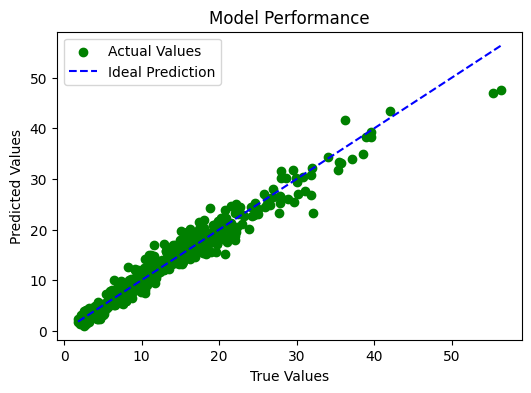


Final Mean Squared Error: 3.2213023556259914


In [ ]:
# Model
import matplotlib.pyplot as plt

split_ratio = 0.8
split_index = int(len(scaled_features) * split_ratio)

scaled_features_train, scaled_features_eval = scaled_features[:split_index], scaled_features[split_index:]
target_train, target_eval = target[:split_index], target[split_index:]

def linear_regression_early_stopping(scaled_features, target, learning_rate, max_epochs, patience, eval_freq):
    weights = np.zeros(scaled_features.shape[1])
    bias = 0

    mse_values = []
    best_mse = float('inf')
    no_improvement_count = 0

    for epoch in range(max_epochs):
        target_pred = np.dot(scaled_features, weights) + bias
        error = target - target_pred

        gradient = np.dot(error, scaled_features)
        gradient = np.clip(gradient, -1, 1)
        weights += learning_rate * gradient
        bias += learning_rate * np.sum(error)

        mse = np.mean(error ** 2)
        mse_values.append(mse)

        if (epoch + 1) % eval_freq == 0:
            target_pred_eval = np.dot(scaled_features_eval, weights) + bias
            eval_mse = np.mean((target_eval - target_pred_eval) ** 2)

            if eval_mse < best_mse:
                best_mse = eval_mse
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            if no_improvement_count >= patience:
                print(f"Early stopping at epoch {epoch+1} due to no improvement.")
                break

    return weights, bias, mse_values

learning_rate = 0.001
max_epochs = 2000
patience = 50
eval_freq = 50

weights, bias, mse_values = linear_regression_early_stopping(scaled_features_train, target_train, learning_rate, max_epochs, patience, eval_freq)

target_pred_eval = np.dot(scaled_features_eval, weights) + bias
final_mse = np.mean((target_eval - target_pred_eval) ** 2)

plt.figure(figsize=(6, 4))
plt.scatter(target_eval, target_pred_eval, color='green', label='Actual Values')
plt.plot([min(target_eval), max(target_eval)], [min(target_eval), max(target_eval)], color='blue', linestyle='--', label='Ideal Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Model Performance')
plt.show()

print("\nFinal Mean Squared Error:", final_mse)

In [ ]:
# Predicton
new_data = scaled_features_eval
predicted_values = np.dot(new_data, weights) + bias
print("Predicted Values:", predicted_values)

Predicted Values: [ 7.87869776  6.99843518  5.46594838  9.69705259  5.93556492  5.87450993
 10.92040988  5.87140461  6.54136885  4.50351662  8.32150407  9.37579145
  8.06331923  7.35459029  7.8047578   2.85475306  9.39456408  9.51054429
 17.94535361  4.82679105  8.58609905  1.82871648  8.99125457 10.58039762
  9.7949474   7.0190879   4.32128306  5.22636688  6.14313081  9.38145184
  5.53358196  9.74848722  5.27031313  4.92846893  1.96970521  6.54340401
  2.28689837  2.28672431 15.06505798  1.25386584  8.15967299  9.39453509
  5.80127837  8.91023686  1.0033474   3.1501072   6.73431513  5.16989922
  8.49325365  7.30415715  1.42264582 11.80513689  2.31598299  3.05148343
  7.53218924  6.70135469  1.57061876  2.06840016  8.37473459  8.0847219
  1.29858122  3.44517837 13.2596933   6.51978101  2.25290856  2.00712451
  3.3844495   7.35593512  5.99160895  7.61800037  4.19461263  6.20848507
  7.92483     6.16733709  4.0581329   5.61602064  5.03883716  3.5808208
  4.40547645  5.27917238  8.8174331

In [ ]:
# MSE
mse = np.mean((target_eval - predicted_values) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 3.2213023556259914


# ---> Perceptron using specialized libraries

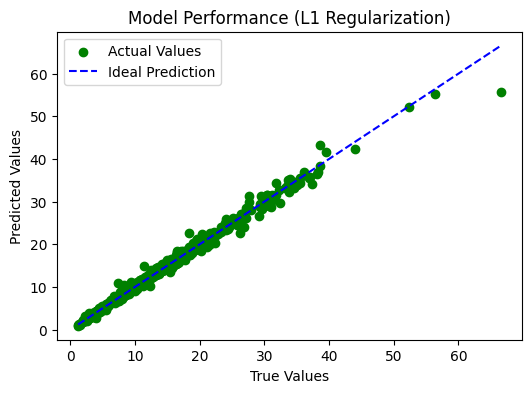


Final Mean Squared Error (L1 Regularization): 0.9467706299221995


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt

split_ratio = 0.8
scaled_features_train, scaled_features_eval, target_train, target_eval = train_test_split(
    scaled_features, target, test_size=1 - split_ratio
)

# L1 (Lasso) regularization model
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(scaled_features_train, target_train)

target_pred_eval = lasso.predict(scaled_features_eval)
mse = np.mean((target_eval - target_pred_eval) ** 2)

plt.figure(figsize=(6, 4))
plt.scatter(target_eval, target_pred_eval, color='green', label='Actual Values')
plt.plot([min(target_eval), max(target_eval)], [min(target_eval), max(target_eval)], color='blue', linestyle='--', label='Ideal Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Model Performance (L1 Regularization)')
plt.show()

print("\nFinal Mean Squared Error (L1 Regularization):", mse)

In [ ]:
# Prediction
lasso_predicted_values = lasso.predict(scaled_features_eval)
print("Lasso Predicted Values:", lasso_predicted_values)

Lasso Predicted Values: [10.80275944 34.07527246  2.22232499  4.22151895  3.8104343  35.25278451
  3.96580884 29.83872494 27.1914468   6.86255722 18.1919262   6.26892957
 13.85023804  1.84409178  4.63386307  4.86563696  8.30712702 31.24346135
  2.51741857 20.123806   28.66543965  4.32233933 18.73801796  5.02234064
  6.88958397  4.27725306 20.79427786 19.68813871 22.55092466 19.3349798
 11.13691494 33.92780676 20.70682594 17.05546996  5.1113262   7.13461053
 14.77684477  7.5875992   5.0742269  21.64104565  4.11342554  7.05607975
  9.8973147   4.88840475  9.58324226 31.63947335 14.36731747 30.59727772
  4.75415785  5.28679327  7.91544014  6.46953957 13.79669662  2.77190776
 16.42057792 13.89934813  6.70571382  6.67036117 26.2145274  10.34082658
 10.82204742  3.19299484  5.40696084 12.72701235  6.1760372  11.01032561
 14.61998159 20.23758901 14.42372103 21.15156406 13.03256743  6.88802462
  7.69916961 13.61573667  8.42103581  5.44931176  2.53807598 12.43334072
  8.73947928  1.20871552 17.

In [ ]:
# MSE
mse = np.mean((target_eval - lasso_predicted_values) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.9467706299221995


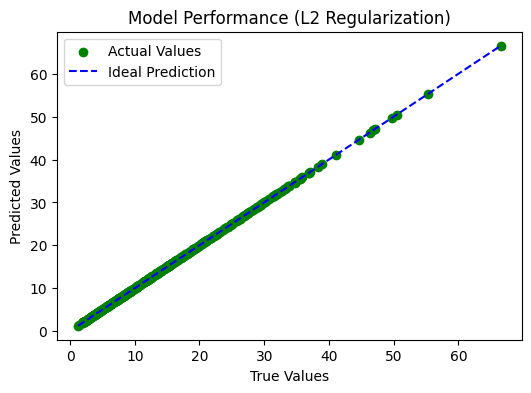


Final Mean Squared Error (L2 Regularization): 0.00037033309379342814


In [ ]:
# L2 (Ridge) regularization model
ridge = Ridge(alpha=0.01)
ridge.fit(scaled_features_train, target_train)

target_pred_eval = ridge.predict(scaled_features_eval)
mse = np.mean((target_eval - target_pred_eval) ** 2)

plt.figure(figsize=(6, 4))
plt.scatter(target_eval, target_pred_eval, color='green', label='Actual Values')
plt.plot([min(target_eval), max(target_eval)], [min(target_eval), max(target_eval)], color='blue', linestyle='--', label='Ideal Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Model Performance (L2 Regularization)')
plt.show()

print("\nFinal Mean Squared Error (L2 Regularization):", mse)

In [ ]:
# Prediction
ridge_predicted_values = ridge.predict(scaled_features_eval)
print("Ridge Predicted Values:", ridge_predicted_values)

Ridge Predicted Values: [10.8740886  34.72058773  2.00097963  4.22214344  3.42921525 34.02411636
  3.75394314 27.64022304 26.62685149  6.35893441 16.58186442  5.94866863
 14.16623991  1.83404635  4.35275309  5.1018377   7.93184113 27.73346393
  2.77346543 19.48411244 30.935977    4.42246211 18.03138034  5.02634772
  6.79304804  4.5693126  20.23165086 21.15132134 21.5506306  19.29847943
 10.30920242 35.02083114 19.50834034 17.3792164   4.87995541  7.33656493
 14.1782216   7.24856716  5.35115734 21.59151788  4.25002176  7.42339057
  9.75838873  4.86078414 10.02557807 31.78345633 14.59026752 30.30335561
  4.71371874  5.50578482  8.0361804   6.35562281 13.92848555  3.89558418
 17.75905716 13.26691251  6.78060124  6.70732596 27.16807677 11.22391106
 10.30369322  3.21170038  5.38124806 12.86501732  6.21816146  7.49094581
 15.64199024 19.03414861 13.89993903 19.58198162 12.58421471  7.05695406
  7.70398776 15.38553127  8.83416691  5.33802222  2.26696742 12.8293959
  7.73851075  1.41510293 17.

In [ ]:
# MSE
mse = np.mean((target_eval - ridge_predicted_values) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.00028906517440952445
